In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

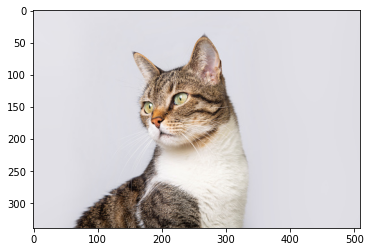

In [26]:
img_path = "./cat.jpg"
rgb = plt.imread(img_path)

plt.imshow(rgb)

In [3]:
rgb.shape

(339, 509, 3)

In [27]:
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
gray.shape

(339, 509)

In [28]:
fftimg = np.fft.fft2(gray)
fftimg.shape

(339, 509)

In [29]:
fftimg

array([[35402707.        +6.28773478e-10j,
         2002834.73656245+1.31789759e+06j,
         -282548.82429188-7.40271936e+05j, ...,
           92145.87199029+1.45721349e+04j,
         -282548.82429188+7.40271936e+05j,
         2002834.73656245-1.31789759e+06j],
       [ -317367.58299702-1.99973374e+05j,
         -844220.14382743+4.31012815e+05j,
          992584.61014494+5.18947587e+05j, ...,
         -163628.92385109-3.97149556e+05j,
          500363.80191271+9.21068630e+05j,
          218365.02303145-1.04495534e+06j],
       [ -728565.23463804-1.47173137e+06j,
         -441884.59514654+9.93056589e+05j,
          283697.91989345+1.67563106e+05j, ...,
          269561.06263564+2.84432706e+04j,
         -530781.67471731-7.56228992e+04j,
         1125556.91431   +5.28935024e+05j],
       ...,
       [  -80328.46922877+7.73836732e+05j,
          505073.42737199-2.19642009e+05j,
         -269762.97046382-6.52593610e+04j, ...,
          173072.16500298-3.77882516e+05j,
           56823.70

In [9]:
centered_fftimg = np.fft.fftshift(fftimg)

In [10]:
centered_fftimg

array([[   61.99145112 -520.016399j  ,  -574.99434579+1234.78673584j,
         1575.25136184 -780.04365759j, ...,
         -610.2532127  +255.56470454j,  1078.109524   +341.06417553j,
         -431.41064994 -340.22437815j],
       [  765.88936286-2011.63862731j, -1443.64765059 +604.85596766j,
         1088.13632103+1169.32454451j, ...,
          962.58635172+1700.0691796j ,  -490.68920179-2040.68357743j,
          100.85463138+2253.90763954j],
       [ 1530.4972287 +2375.65678437j, -1317.17083892-2890.75632453j,
         -126.87905346+2774.33829697j, ...,
        -1162.27404519-2107.60634872j,  1192.5642235 +2767.04209609j,
        -1095.77324116-2486.55400352j],
       ...,
       [-1095.77324116+2486.55400352j,  1192.5642235 -2767.04209609j,
        -1162.27404519+2107.60634872j, ...,
         -126.87905346-2774.33829697j, -1317.17083892+2890.75632453j,
         1530.4972287 -2375.65678437j],
       [  100.85463138-2253.90763954j,  -490.68920179+2040.68357743j,
          962.58635172

In [33]:
magnitude_spectrum = 100 * np.log(np.abs(fftimg))
centered_magnitude_spectrum = 100 * np.log(np.abs(centered_fftimg))
# np.abs(fftimg)

# 100 * np.log(np.abs(fftimg))

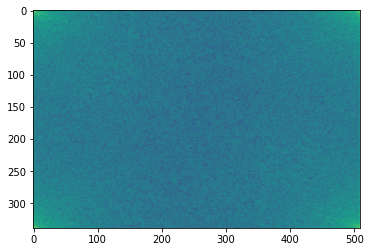

In [36]:
# plt.imshow(centered_magnitude_spectrum)
plt.imshow(magnitude_spectrum)

In [17]:
print(gray.shape, fftimg.shape, centered_fftimg.shape)
print(gray.max(), gray.min(), fftimg.max(), fftimg.min(), centered_fftimg.max(), centered_fftimg.min())

(339, 509) (339, 509) (339, 509)
254 0 (35402707+6.287734777288279e-10j) (-844220.1438274258-431012.8147581192j) (35402707+6.287734777288279e-10j) (-844220.1438274258-431012.8147581192j)


In [44]:
ncols, nrows = gray.shape
sigmax, sigmay = 25, 25
cx, cy = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
print(gaussian_filter.shape)

(339, 509)


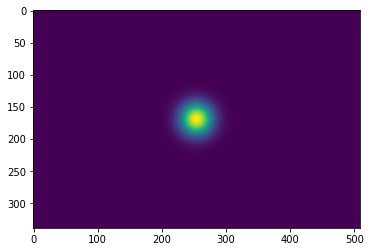

In [45]:
plt.imshow(gaussian_filter)

In [46]:
fftimg_gf = centered_fftimg * gaussian_filter
filtered_img = np.abs(np.fft.ifft2(fftimg_gf))


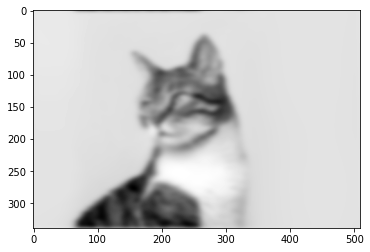

In [47]:
plt.imshow(filtered_img, cmap='gray')

(339, 509) (339, 509) (339, 509)
254 0 (35402707+6.287734777288279e-10j) (-844220.1438274258-431012.8147581192j) (35402707+6.287734777288279e-10j) (-844220.1438274258-431012.8147581192j)
(339, 509)


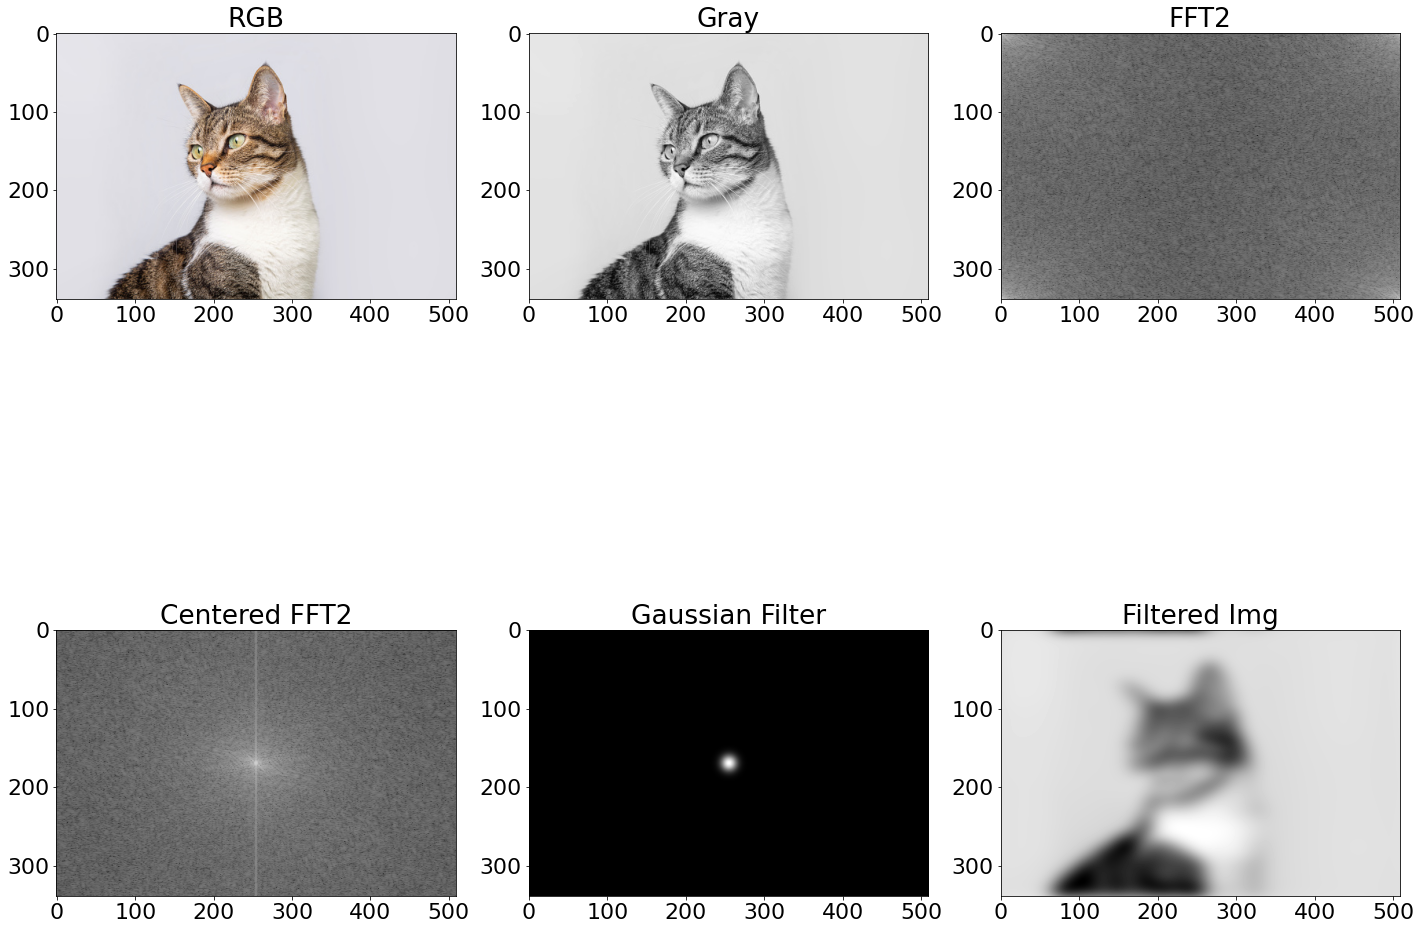

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = './cat.jpg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# Build a Gaussian filter.
	ncols, nrows = gray.shape
	gaussian_filter = build_gaussian_filter(ncols, nrows)

	# Apply Gaussian filter
	ftimg_gf = centered_ftimg * gaussian_filter
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, gaussian_filter, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Gaussian Filter', 'Filtered Img']
	figpath = '/home/bibrity/DigitalImageProcessing/FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (20, 20))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	# plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src_img = cv2.imread('./scenary2.jpeg',0)

plt.imshow(src_img,cmap='gray')
plt.savefig('inputImg.png')
plt.show()

src_img_hist = cv2.calcHist([src_img],[0],None,[256],[0,256])
hist_equ_cv2 = cv2.equalizeHist(src_img)
L = pow(2,8)

def doHistEqu(img,histogram,L):
    CDF = histogram.cumsum()
    CDFmin = CDF.min()
    r,c = img.shape
    size = r * c
    newImg = np.zeros((r,c),np.uint8)
    for x in range(r):
        for y in range(c):
            newImg[x,y] = ((CDF[img[x,y]] - CDFmin) / (size - CDFmin)) * (L-1)

    return newImg

In [52]:
src_img_hist = cv2.calcHist([gray],[0],None,[256],[0,256])

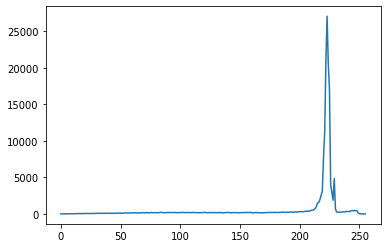

In [54]:
plt.plot(src_img_hist)

In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src_img = cv2.imread('./cat.jpg',0)

# plt.imshow(src_img,cmap='gray')
# plt.savefig('inputImg.png')
# plt.show()

src_img_hist = cv2.calcHist([src_img],[0],None,[256],[0,256])
hist_equ_cv2 = cv2.equalizeHist(src_img)
L = pow(2,8)

def doHistEqu(img,histogram,L):
    CDF = histogram.cumsum()
    CDFmin = CDF.min()
    r,c = img.shape
    size = r * c
    newImg = np.zeros((r,c),np.uint8)
    for x in range(r):
        for y in range(c):
            newImg[x,y] = ((CDF[img[x,y]] - CDFmin) / (size - CDFmin)) * (L-1)

    return newImg

equ_img = doHistEqu(src_img,src_img_hist,L)

(array([246.,   4.,   1.,   0.,   1.,   0.,   1.,   2.,   0.,   1.]),
 array([    0. ,  2708.4,  5416.8,  8125.2, 10833.6, 13542. , 16250.4,
        18958.8, 21667.2, 24375.6, 27084. ], dtype=float32),
 <BarContainer object of 10 artists>)

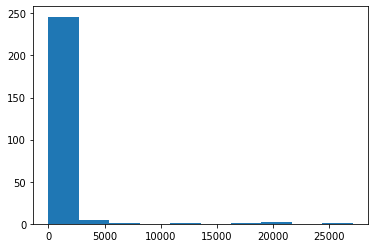

In [61]:
# plt.hist(src_img_hist)
# plt.plot(hist_equ_cv2)

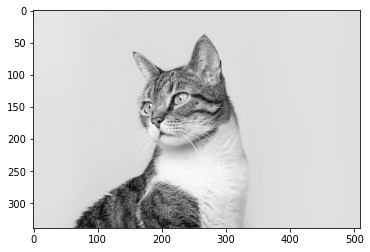

In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src_img = cv2.imread('cat.jpg',0)

plt.imshow(src_img,cmap='gray')
plt.savefig('inputImg.png')
plt.show()

src_img_hist = cv2.calcHist([src_img],[0],None,[256],[0,256])
hist_equ_cv2 = cv2.equalizeHist(src_img)
L = pow(2,8)

def doHistEqu(img,histogram,L):
    CDF = histogram.cumsum()
    CDFmin = CDF.min()
    r,c = img.shape
    size = r * c
    newImg = np.zeros((r,c),np.uint8)
    for x in range(r):
        for y in range(c):
            newImg[x,y] = ((CDF[img[x,y]] - CDFmin) / (size - CDFmin)) * (L-1)

    return newImg

equ_img = doHistEqu(src_img,src_img_hist,L)
img_set = [src_img,hist_equ_cv2,equ_img]
title_set = ['Source Image','Source Image Histogram','OpenCV Equalized Image',
                'OpenCV Equalized Image Histogram','Implemented Equalized Image',
                    'Implemented Equalized Image Histogram']

def plot_img(img_set,title_set):
    n = len(img_set)
    r,c = 3,2
    plt.figure(figsize=(20,20))
    for i in range(n):
        plt.subplot(r,c,i*2+1)
        plt.imshow(img_set[i],cmap='gray')
        plt.title(title_set[i*2])
        plt.subplot(r,c,i*2+2)
        plt.hist(img_set[i].flatten(),256,[0,256])
        plt.title(title_set[i*2+1])
    plt.savefig('HistEquOpenCV.png')   
    plt.show()

# plot_img(img_set,title_set)


ValueError: too many values to unpack (expected 2)